### Good Evening to all

### Random Forest Algorithm
- efficient results for the large datsets
- works better even though dataset has missing values

In [4]:
import pandas as pd
df=pd.read_csv("birds.csv")
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [5]:
df["type"].unique()

array(['SW', 'W', 'T', 'R', 'P', 'SO'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])
df.head()

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


In [7]:
df["type"].unique()

array([3, 5, 4, 1, 0, 2], dtype=int64)

In [8]:
df.isna().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [9]:
#replacing all the values with zero
import numpy as np
df=df.replace(np.nan,0.0)

In [10]:
df.isna().sum()

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64

In [12]:
x=df.iloc[:,1:11]
x.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13


In [30]:
y=df["type"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=100)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred=model.predict(x_test)
y_pred

array([5, 0, 2, 5, 3, 3, 2, 0, 1, 3, 1, 3, 2, 1, 2, 5, 2, 1, 3, 2, 2, 2,
       1, 0, 1, 4, 5, 2, 2, 0, 0, 1, 2, 2, 5, 2, 2, 0, 3, 3, 2, 2])

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.8571428571428571


#### Unsupervised learning
- train your machine on unlabelled without any guidance
- Clustering--grouping of similar datapoints into clusters
- Association

***Clustering***
* K-Means(k-no of clusters)
    - choose the optimal value of k
    - initializing the centroids
    - finding out mean and distances
    - repeat step 2 and 3 untill convergence

In [34]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [38]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [41]:
x=df.iloc[:,0:4]
range_k=range(1,8)
wsse_list=[]
from sklearn.cluster import KMeans
for k in range_k:
    model=KMeans(n_clusters=k)
    model.fit(x)
    wsse=model.inertia_
    wsse_list.append(wsse)
    print("the wsse for k={} is {}".format(k,wsse))

the wsse for k=1 is 681.3706
the wsse for k=2 is 152.34795176035792
the wsse for k=3 is 78.85144142614601
the wsse for k=4 is 57.228473214285714
the wsse for k=5 is 46.472230158730156
the wsse for k=6 is 39.03998724608725
the wsse for k=7 is 34.299712121212124


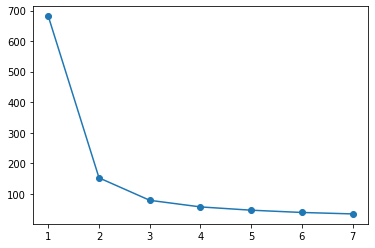

In [43]:
import matplotlib.pyplot as plt
x1=range_k
y1=wsse_list
plt.plot(x1,y1,marker='o')
plt.show()

In [44]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
pred_out=model.predict(x)
pred_out

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [47]:
df["pred_target"]=pred_out
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pred_target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [49]:
df["pred_target"].value_counts()

2    62
1    50
0    38
Name: pred_target, dtype: int64

***exam timings:6:45pm to 7:15pm***

In [ ]:
range(1,8)
1,2,3,4,5,6,7